### Using ARIMA, I forecast the transport demand for the year 2050

In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

# upload the data
header = ['year', 'tdemand']
dtypes = {'year':'str', 'tdemand':'float'} # we change the dtypes from object to string and float
#upload the data
df = pd.read_csv('Data_Task_MA.csv', sep=';', header=0, names=header, dtype=dtypes)

In [7]:
#conduct the Dickey-Fuller test for stationarity
def adfuller_test(tdemand):
    result = adfuller(tdemand)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )



adfuller_test(df['tdemand']) # we need a p-value smaller than 0.05, however, we prefer a p-value as near to zero as possible.

ADF Test Statistic : -2.9089971321144885
p-value : 0.04431171234330416
#Lags Used : 7
Number of Observations : 10


In [ ]:
# Therefore, we take the first differencing
df['tdemand1'] = df['tdemand'] - df['tdemand'].shift(1)
df = df.dropna() #drom NaN cells


In [9]:
# We repeat the same test for the new column 
from statsmodels.tsa.stattools import adfuller
def adfuller_test1(tdemand):
    result = adfuller(tdemand)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

adfuller_test1(df['tdemand1']) # p-value is so small, thus the variable is stationary

ADF Test Statistic : -6.880822993791738
p-value : 1.43497932931891e-09
#Lags Used : 2
Number of Observations : 14


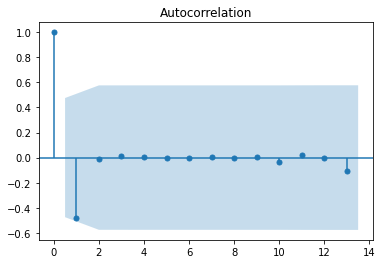

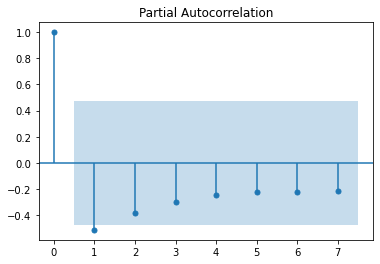

In [10]:
# we take ACF and PACF tests of autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(df['tdemand1'].dropna())
fig1=plot_pacf(df['tdemand1'], lags=7)

# We consider only PACF at lag 1 - because it is the only significat correlation (outside the blue box). 
#We do not consider lag 0 - since it is correlation with itself.


<AxesSubplot:>

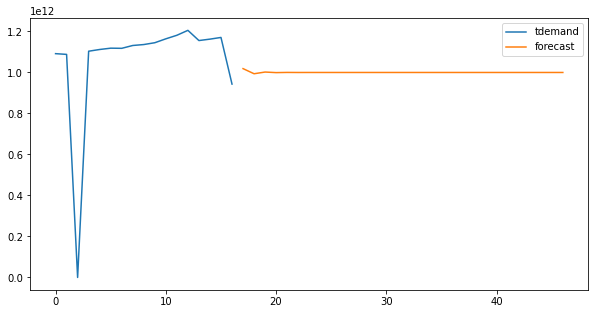

In [48]:
#best model is AR model. From ACF and PACF, we consider only autocorrelation (AR) to make the forecasting, thus, MA is zero.
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['tdemand'],order=(1, 1, 0)) # we consider only AR (lag 1) and I (1), MA (0)
results=model.fit()
df['forecast']=results.predict(start=17,end=46, dynamic=True)
df[['tdemand','forecast']].plot(figsize=(10,5)) # period zero to 17 is our years, period 46 is the year 2050

In [ ]:
# This way we manually add years from 2020-2050
df1 = {'year': '2050'}

df = df.append(df1, ignore_index = True)

df

df. drop(df.index[-2]) 